In [1]:
from mace.calculators import MACECalculator
import torch 
from ase.io import read

/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/e3nn/o3/_wigner.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _Jd, _W3j_flat, _W3j_indices = torch.l

cuequivariance or cuequivariance_torch is not available. Cuequivariance acceleration will be disabled.


In [4]:
import torch
from calorine.tools import get_force_constants, relax_structure

model_path = "/Users/prakriti/Downloads/mace-mh-1.model"

device = "cpu"
heads = ['omol']

calc = MACECalculator(model_paths=model_path,device=device,head=heads,default_dtype="float32")

atoms = read("/Users/prakriti/methanol-alpha_POSCAR")
atoms.calc = calc
print("Energy:", atoms.get_potential_energy())
relax_structure(atoms, fmax=0.0001)
print("Energy:", atoms.get_potential_energy())

/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/mace/calculators/mace.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_lo

Using head ['omol'] out of ['matpes_r2scan', 'mp_pbe_refit_add', 'spice_wB97M', 'oc20_usemppbe', 'omol', 'omat_pbe']
Default dtype float32 does not match model dtype float64, converting models to float32.
Energy: -122.0848388671875
Energy: -122.61280822753906


In [5]:
import numpy as np
from ase.io import read, write
from ase import Atoms
from calorine.calculators import CPUNEP
from ase.spacegroup.symmetrize import FixSymmetry
from calorine.tools import get_force_constants, relax_structure
from pandas import DataFrame
from phonopy.units import THzToCm
from seekpath import get_explicit_k_path
import phonopy
from ase.constraints import UnitCellFilter
from ase.optimize import BFGS
from matplotlib import pyplot as plt
import warnings
import mplpub
mplpub.setup(template='acs')
warnings.filterwarnings("ignore", category=DeprecationWarning) 

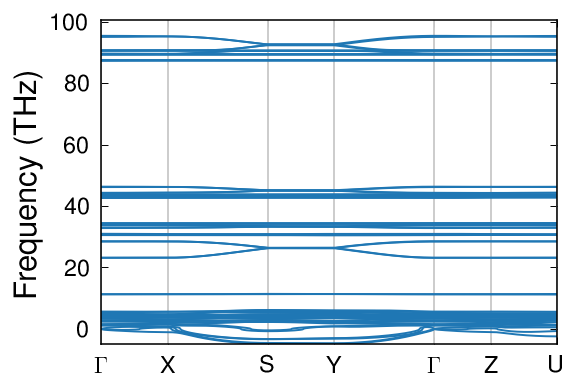

In [6]:
phonon = get_force_constants(atoms, calc, [1,1,1])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

path = "GXSYGZU"
special_points = dict(
    G = [0,0,0],
    R = [1/2, 1/2, 1/2],
    S = [1/2, 1/2, 0],
    T = [0, 1/2, 1/2],
    U = [1/2, 0, 1/2],
    X = [1/2, 0, 0],
    Y = [0, 1/2, 0],
    Z = [0 ,0, 1/2]
)
path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()
fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)
ax.set_ylabel('Frequency (THz)', fontsize=16)

xticks = [d[0] for d in phonopy_dists] + [phonopy_dists[-1][-1]]
labels = [r'$\UG{\Gamma}$' if m == 'G' else m for m in list(path)]
ax.set_xticks(xticks)
ax.set_xticklabels(labels)
for xp in xticks:
    ax.axvline(xp, color='0.8')

ax.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax.set_ylim(np.vstack(phonopy_freqs).min())
ax.tick_params(labelsize=12)

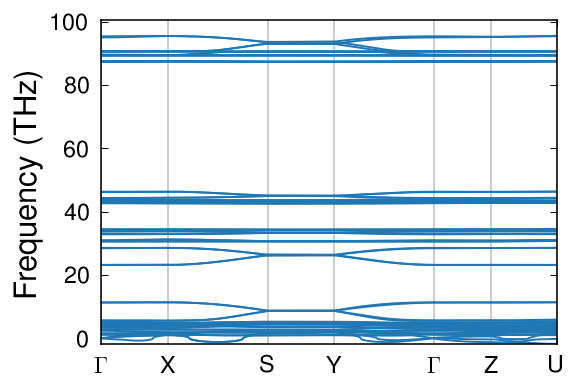

In [7]:
phonon = get_force_constants(atoms, calc, [2,2,1])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

path = "GXSYGZU"
special_points = dict(
    G = [0,0,0],
    R = [1/2, 1/2, 1/2],
    S = [1/2, 1/2, 0],
    T = [0, 1/2, 1/2],
    U = [1/2, 0, 1/2],
    X = [1/2, 0, 0],
    Y = [0, 1/2, 0],
    Z = [0 ,0, 1/2]
)
path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)
ax.set_ylabel('Frequency (THz)', fontsize=16)

xticks = [d[0] for d in phonopy_dists] + [phonopy_dists[-1][-1]]
labels = [r'$\UG{\Gamma}$' if m == 'G' else m for m in list(path)]
ax.set_xticks(xticks)
ax.set_xticklabels(labels)
for xp in xticks:
    ax.axvline(xp, color='0.8')

ax.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax.set_ylim(np.vstack(phonopy_freqs).min())
ax.tick_params(labelsize=12)
#fig.savefig('Pnm', bbox_inches='tight')

In [8]:
phonon = get_force_constants(atoms, calc, [3,3,1])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

path = "GXSYGZU"
special_points = dict(
    G = [0,0,0],
    R = [1/2, 1/2, 1/2],
    S = [1/2, 1/2, 0],
    T = [0, 1/2, 1/2],
    U = [1/2, 0, 1/2],
    X = [1/2, 0, 0],
    Y = [0, 1/2, 0],
    Z = [0 ,0, 1/2]
)
path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)
ax.set_ylabel('Frequency (THz)', fontsize=16)

xticks = [d[0] for d in phonopy_dists] + [phonopy_dists[-1][-1]]
labels = [r'$\UG{\Gamma}$' if m == 'G' else m for m in list(path)]
ax.set_xticks(xticks)
ax.set_xticklabels(labels)
for xp in xticks:
    ax.axvline(xp, color='0.8')

ax.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax.set_ylim(np.vstack(phonopy_freqs).min())
ax.tick_params(labelsize=12)
#fig.savefig('Pnm', bbox_inches='tight')

KeyboardInterrupt: 

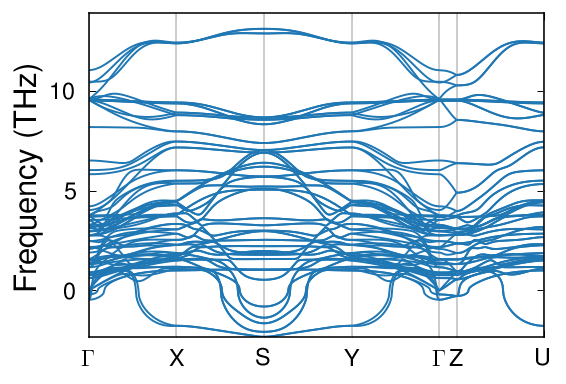

In [ ]:
phonon = get_force_constants(atoms, calc, [4,4,1])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

path = "GXSYGZU"
special_points = dict(
    G = [0,0,0],
    R = [1/2, 1/2, 1/2],
    S = [1/2, 1/2, 0],
    T = [0, 1/2, 1/2],
    U = [1/2, 0, 1/2],
    X = [1/2, 0, 0],
    Y = [0, 1/2, 0],
    Z = [0 ,0, 1/2]
)
path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)
ax.set_ylabel('Frequency (THz)', fontsize=16)

xticks = [d[0] for d in phonopy_dists] + [phonopy_dists[-1][-1]]
labels = [r'$\UG{\Gamma}$' if m == 'G' else m for m in list(path)]
ax.set_xticks(xticks)
ax.set_xticklabels(labels)
for xp in xticks:
    ax.axvline(xp, color='0.8')

ax.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax.set_ylim(np.vstack(phonopy_freqs).min())
ax.tick_params(labelsize=12)
#fig.savefig('Pnm', bbox_inches='tight')